<a href="https://colab.research.google.com/github/shauryapanhale/BML/blob/main/BML_EXP_5%2C7%2C8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DESCISION TREE READY MADE

In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split

# Load and prepare the new dataset
data = pd.read_csv("/content/Book1.csv")

# Encode categorical variables using LabelEncoder
label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

# Define features (X) and target (y)
X = data.drop('play golf ', axis=1)
y = data['play golf ']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Decision Tree Classifier
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display the accuracy
print("Accuracy:", accuracy)


Accuracy: 0.4


DESCISION TREE(MANUALLY)

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load and prepare the dataset
data = pd.read_csv("/content/Book1.csv")

# Encode categorical variables using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

# Define features (X) and target (y)
X = data.drop('play golf ', axis=1)
y = data['play golf ']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Helper functions for entropy and information gain
def entropy(y):
    proportions = np.bincount(y) / len(y)
    return -np.sum([p * np.log2(p) for p in proportions if p > 0])

def information_gain(y, left_indices, right_indices):
    parent_entropy = entropy(y)
    left_entropy = entropy(y[left_indices])
    right_entropy = entropy(y[right_indices])
    n = len(y)
    n_left, n_right = len(left_indices), len(right_indices)
    weighted_entropy = (n_left / n) * left_entropy + (n_right / n) * right_entropy
    return parent_entropy - weighted_entropy

# Building the Decision Tree
class DecisionTreeNode:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

class DecisionTreeClassifierScratch:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.root = None

    def fit(self, X, y):
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # Stopping criteria
        if depth >= self.max_depth or n_labels == 1 or n_samples < 2:
            leaf_value = np.bincount(y).argmax()
            return DecisionTreeNode(value=leaf_value)

        # Find the best split
        best_gain = -1
        split_idx, split_threshold = None, None
        for feature_idx in range(n_features):
            thresholds = np.unique(X[:, feature_idx])
            for threshold in thresholds:
                left_indices = np.where(X[:, feature_idx] <= threshold)[0]
                right_indices = np.where(X[:, feature_idx] > threshold)[0]
                if len(left_indices) == 0 or len(right_indices) == 0:
                    continue
                gain = information_gain(y, left_indices, right_indices)
                if gain > best_gain:
                    best_gain = gain
                    split_idx = feature_idx
                    split_threshold = threshold

        # Split data
        left_indices = np.where(X[:, split_idx] <= split_threshold)[0]
        right_indices = np.where(X[:, split_idx] > split_threshold)[0]
        left_child = self._grow_tree(X[left_indices], y[left_indices], depth + 1)
        right_child = self._grow_tree(X[right_indices], y[right_indices], depth + 1)
        return DecisionTreeNode(feature=split_idx, threshold=split_threshold, left=left_child, right=right_child)

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.value is not None:
            return node.value
        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

# Convert training data to NumPy arrays for custom implementation
X_train_np = X_train.values
y_train_np = y_train.values
X_test_np = X_test.values

# Train the custom Decision Tree Classifier
tree = DecisionTreeClassifierScratch(max_depth=3)
tree.fit(X_train_np, y_train_np)

# Make predictions
y_pred = tree.predict(X_test_np)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test.values)
print("Accuracy:", accuracy)


Accuracy: 0.6666666666666666


KNN READY MADE

In [19]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv(r"/content/wowww.csv")

# Feature columns: all columns except 'Outcome' (the target column)
X = df.drop('Outcome', axis=1).values  # Features
y = df['Outcome'].values  # Target variable (Outcome)

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN model with k=5 (you can adjust k as needed)
model = KNeighborsClassifier(n_neighbors=5)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.6623376623376623
Confusion Matrix:
 [[70 29]
 [23 32]]


KNN MANUALLY

In [20]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv(r"/content/wowww.csv")

# Feature columns: all columns except 'Outcome' (the target column)
X = df.drop('Outcome', axis=1).values  # Features
y = df['Outcome'].values  # Target variable (Outcome)

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Euclidean Distance function
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# KNN Classifier function (manually)
def knn(X_train, y_train, X_test, k=3):
    predictions = []

    # For each test point
    for test_point in X_test:
        distances = []

        # Calculate the distance to every training point
        for i, train_point in enumerate(X_train):
            distance = euclidean_distance(test_point, train_point)
            distances.append((distance, i))

        # Sort the distances and pick the k closest points
        distances.sort(key=lambda x: x[0])
        nearest_neighbors = distances[:k]

        # Get the labels of the nearest neighbors
        neighbor_labels = [y_train[i] for _, i in nearest_neighbors]

        # Get the most common class label (majority vote)
        most_common = Counter(neighbor_labels).most_common(1)
        predictions.append(most_common[0][0])  # Add the predicted class

    return np.array(predictions)

# Train and make predictions using manual KNN
k = 5  # You can change this to any value for 'k'
predictions = knn(X_train, y_train, X_test, k)

# Calculate accuracy
accuracy = np.mean(predictions == y_test)
print("Accuracy:", accuracy)

# Print confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.6623376623376623
Confusion Matrix:
 [[70 29]
 [23 32]]


K MEANS CLUSTERING READY MADE

Cluster Centers (Centroids):
 [[-0.26489422  0.64628823  0.26298746  0.89342852  1.02126799  0.63208219
   0.41176195 -0.12515833]
 [ 1.01888184  0.23526795  0.40087778 -0.48012719 -0.45255901  0.02379893
  -0.10364969  1.06754881]
 [-0.50524078 -0.56782518 -0.43296503 -0.25207235 -0.35183994 -0.41884153
  -0.19400813 -0.62655557]]
Cluster Sizes: {np.int32(0): np.int64(213), np.int32(1): np.int64(221), np.int32(2): np.int64(334)}


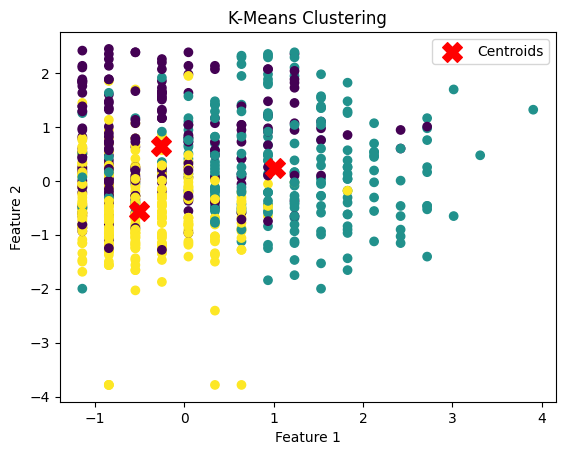

In [21]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np  # Import numpy to use np.unique

# Load the dataset
df = pd.read_csv(r"/content/wowww.csv")

# Feature columns: all columns except 'Outcome' (the target column)
X = df.drop('Outcome', axis=1).values  # Features

# Feature Scaling: It's a good practice to scale features for K-Means
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale the features

# Apply K-Means clustering with k=3 (for example, we choose 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Get the cluster labels
labels = kmeans.labels_

# Print the cluster centers (centroids)
print("Cluster Centers (Centroids):\n", kmeans.cluster_centers_)

# Print the number of samples in each cluster
unique, counts = np.unique(labels, return_counts=True)
print("Cluster Sizes:", dict(zip(unique, counts)))

# Visualize the clustering (optional, for 2D visualization)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title("K-Means Clustering")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

K MEANS CLUSTERING MANUALLY

Convergence reached after 17 iterations.
Cluster Centers (Centroids):
 [[ 1.08194386  0.2972029   0.42159496 -0.37996824 -0.38353716  0.06924224
  -0.04523723  1.14777824]
 [-0.35819002  0.55983946  0.22359726  0.89652484  0.97458723  0.62331635
   0.38707461 -0.22179196]
 [-0.46067918 -0.54843901 -0.41228464 -0.33221423 -0.37997137 -0.44368966
  -0.21923475 -0.59010462]]
Cluster Sizes: {np.int64(0): np.int64(215), np.int64(1): np.int64(216), np.int64(2): np.int64(337)}


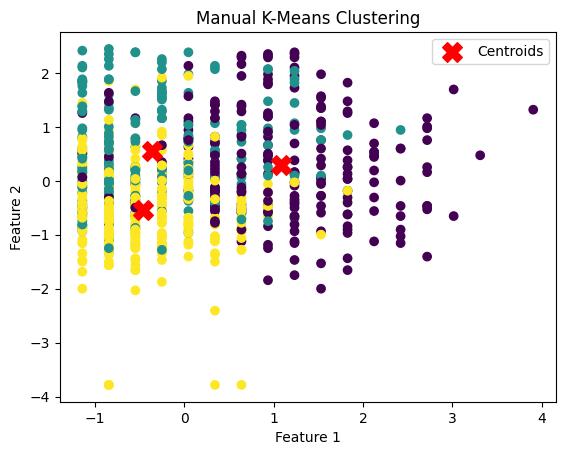

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv(r"/content/wowww.csv")

# Feature columns: all columns except 'Outcome' (the target column)
X = df.drop('Outcome', axis=1).values  # Features

# Feature Scaling: Scaling features for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale the features

# Manual K-Means clustering implementation
def initialize_centroids(X, k):
    """Randomly initialize k centroids"""
    np.random.seed(42)  # Set seed for reproducibility
    random_indices = np.random.choice(X.shape[0], size=k, replace=False)
    return X[random_indices]

def assign_clusters(X, centroids):
    """Assign each point to the nearest centroid"""
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    """Update centroids to be the mean of points in each cluster"""
    centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        centroids[i] = X[labels == i].mean(axis=0)
    return centroids

def kmeans(X, k, max_iters=100, tol=1e-4):
    """Main K-Means algorithm"""
    centroids = initialize_centroids(X, k)
    for i in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)

        # Check for convergence (if centroids don't change significantly)
        if np.all(np.abs(new_centroids - centroids) < tol):
            print(f"Convergence reached after {i+1} iterations.")
            break
        centroids = new_centroids

    return centroids, labels

# Run K-Means manually
k = 3  # Number of clusters
centroids, labels = kmeans(X_scaled, k)

# Print the cluster centers (centroids)
print("Cluster Centers (Centroids):\n", centroids)

# Print the number of samples in each cluster
unique, counts = np.unique(labels, return_counts=True)
print("Cluster Sizes:", dict(zip(unique, counts)))

# Visualize the clustering (for 2D visualization, using only the first two features)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title("Manual K-Means Clustering")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()